<a href="https://colab.research.google.com/github/yeesem/Natural-Laguage-Processing/blob/main/Text_Generation_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
#Read file function
def read_file(filepath):
  with open(filepath) as f:
    str_text = f.read()

  return str_text

In [130]:
read_file("/content/moby_dick_four_chapters.txt")[:1000]

"Call me Ishmael.  Some years ago--never mind how long\nprecisely--having little or no money in my purse, and nothing\nparticular to interest me on shore, I thought I would sail about a\nlittle and see the watery part of the world.  It is a way I have of\ndriving off the spleen and regulating the circulation.  Whenever I\nfind myself growing grim about the mouth; whenever it is a damp,\ndrizzly November in my soul; whenever I find myself involuntarily\npausing before coffin warehouses, and bringing up the rear of every\nfuneral I meet; and especially whenever my hypos get such an upper\nhand of me, that it requires a strong moral principle to prevent me\nfrom deliberately stepping into the street, and methodically knocking\npeople's hats off--then, I account it high time to get to sea as soon\nas I can.  This is my substitute for pistol and ball.  With a\nphilosophical flourish Cato throws himself upon his sword; I quietly\ntake to the ship.  There is nothing surprising in this.  If th

In [76]:
import spacy

In [77]:
nlp = spacy.load('en_core_web_sm',disable = ['parser','tagger','ner'])

In [78]:
nlp_max_length = 1198623

In [79]:
def separate_punc(doc_text):
  return [token.text.lower() for token in nlp(doc_text) if token.text not in '\n\n \n\n\n!"-#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~\t\n ']

In [80]:
d = read_file('/content/moby_dick_four_chapters.txt')

In [81]:
tokens = separate_punc(d)

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [150]:
tokens[:10]

['call',
 'me',
 'ishmael',
 'some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long']

In [83]:
len(tokens)

11338

In [84]:
#25 words --predict--> #20 words
train_len = 25 + 1

text_sequences = []

for i in range(train_len,len(tokens)):
  seq = tokens[i-train_len:i]

  text_sequences.append(seq)

In [85]:
type(text_sequences )

list

In [86]:
text_sequences[0]

['call',
 'me',
 'ishmael',
 'some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long',
 'precisely',
 'having',
 'little',
 'or',
 'no',
 'money',
 'in',
 'my',
 'purse',
 'and',
 'nothing',
 'particular',
 'to',
 'interest',
 'me',
 'on']

In [87]:
text_sequences[1]

['me',
 'ishmael',
 'some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long',
 'precisely',
 'having',
 'little',
 'or',
 'no',
 'money',
 'in',
 'my',
 'purse',
 'and',
 'nothing',
 'particular',
 'to',
 'interest',
 'me',
 'on',
 'shore']

In [88]:
len(text_sequences[0])

26

In [89]:
print(' '.join(text_sequences[0]))
print('\n')
print(' '.join(text_sequences[1]))

call me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on


me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on shore


In [90]:
from keras.preprocessing.text import Tokenizer

In [93]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)

In [94]:
#Assign an id to each of word
sequences[0]

[956,
 14,
 263,
 51,
 261,
 408,
 87,
 219,
 129,
 111,
 954,
 260,
 50,
 43,
 38,
 314,
 7,
 23,
 546,
 3,
 150,
 259,
 6,
 2713,
 14,
 24]

In [137]:
#ID 100 - 'who'
tokenizer.index_word[100]

'who'

In [103]:
for i in sequences[0]:
  print(f"{i:<4} : {tokenizer.index_word[i]}")

956  : call
14   : me
263  : ishmael
51   : some
261  : years
408  : ago
87   : never
219  : mind
129  : how
111  : long
954  : precisely
260  : having
50   : little
43   : or
38   : no
314  : money
7    : in
23   : my
546  : purse
3    : and
150  : nothing
259  : particular
6    : to
2713 : interest
14   : me
24   : on


In [108]:
type(tokenizer.word_counts)

collections.OrderedDict

In [ ]:
#Show to word count for every single word
tokenizer.word_counts

In [121]:
# Get word counts
word_counts = tokenizer.word_counts

# Sort word counts in descending order
sorted_word_counts = sorted(word_counts.items(), key=lambda x: -x[1])

# Print sorted word counts
for word, count in sorted_word_counts[:10]:
    print(f"{word:<15}: {count}")

the            : 15540
a              : 10377
and            : 9646
of             : 8287
i              : 7150
to             : 6497
in             : 5647
it             : 4238
that           : 3770
he             : 3247


In [114]:
vocabulary_size = len(tokenizer.word_counts)

In [115]:
vocabulary_size

2718

In [117]:
type(sequences)

list

In [119]:
import numpy as np
sequences = np.array(sequences)

In [120]:
print(sequences)

[[ 956   14  263 ... 2713   14   24]
 [  14  263   51 ...   14   24  957]
 [ 263   51  261 ...   24  957    5]
 ...
 [ 952   12  166 ...  262   53    2]
 [  12  166 2712 ...   53    2 2718]
 [ 166 2712    3 ...    2 2718   26]]


In [139]:
from keras.utils import to_categorical

In [143]:
#Take every row excep every last column
X = sequences[:,:-1]

In [144]:
y = sequences[:,-1]

In [145]:
y = to_categorical(y,num_classes = vocabulary_size + 1)

In [146]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [147]:
y.shape

(11312, 2719)

In [153]:
X.shape

(11312, 25)

In [156]:
vocabulary_size

2718

In [154]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding

In [165]:
def create_model(vocabulary_size,seq_len):

  model = Sequential()
  #First layer in the model
  #Embedding - Turn positive integers.indexes into dense vectors of fixed size
  model.add(Embedding(vocabulary_size,seq_len,input_length = seq_len))
  #Better take the multiply of sequence length -> num of neurons
  model.add(LSTM(seq_len*6,return_sequences = True))
  model.add(LSTM(seq_len*2))
  model.add(Dense(50,activation = 'relu'))

  model.add(Dense(vocabulary_size,activation='softmax'))

  model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

  model.summary()

  return model

In [166]:
model = create_model(vocabulary_size+1,seq_len)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 25)            67975     
                                                                 
 lstm_2 (LSTM)               (None, 25, 150)           105600    
                                                                 
 lstm_3 (LSTM)               (None, 50)                40200     
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 2719)              138669    
                                                                 
Total params: 354994 (1.35 MB)
Trainable params: 354994 (1.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


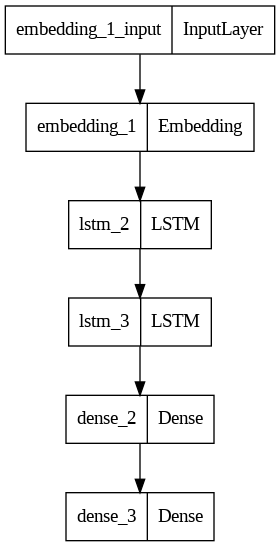

In [167]:
import tensorflow as tf
tf.keras.utils.plot_model(model)

In [163]:
from pickle import dump,load

In [168]:
#batch_size - how many sequences that we want to pass one time
model.fit(X,y,batch_size=128,epochs=50,verbose = 1)

Epoch 1/50
89/89 [==============================] - 18s 148ms/step - loss: 6.9697 - accuracy: 0.0345
Epoch 2/50
89/89 [==============================] - 16s 177ms/step - loss: 6.3711 - accuracy: 0.0529
Epoch 3/50
89/89 [==============================] - 19s 207ms/step - loss: 6.3466 - accuracy: 0.0529
Epoch 4/50
89/89 [==============================] - 14s 152ms/step - loss: 6.3377 - accuracy: 0.0529
Epoch 5/50
89/89 [==============================] - 14s 152ms/step - loss: 6.3348 - accuracy: 0.0529
Epoch 6/50
89/89 [==============================] - 14s 155ms/step - loss: 6.3320 - accuracy: 0.0529
Epoch 7/50
89/89 [==============================] - 17s 189ms/step - loss: 6.3315 - accuracy: 0.0529
Epoch 8/50
89/89 [==============================] - 15s 167ms/step - loss: 6.3321 - accuracy: 0.0529
Epoch 9/50
89/89 [==============================] - 14s 157ms/step - loss: 6.3289 - accuracy: 0.0529
Epoch 10/50
89/89 [==============================] - 17s 196ms/step - loss: 6.3289 - accura

In [169]:
model.save('text_generator_model')

In [170]:
dump(tokenizer,open('my_simpletokenizer','wb'))

In [171]:
from keras.preprocessing.sequence import pad_sequences

In [215]:
def generate_text(model,tokenizer,seq_len,seed_text,num_gen_word):

  output_text = []

  input_text = seed_text

  for i in range(num_gen_word):

    #Convert the data into sequence of number
    encoded_text = tokenizer.texts_to_sequences([input_text])

    #pad_sequences - make sure the input always 25 words
    #input text < 25 - make longer
    #input text > 25 - make shorter
    pad_encoded = pad_sequences(encoded_text,maxlen=seq_len,truncating = 'pre')

    #Will get the probability of every single word
    #Get the index of highest probability
    pred_word_ind = np.argmax(model.predict(pad_encoded),axis = 1)

    pred_word = tokenizer.index_word[pred_word_ind[0]]

    input_text += " " + pred_word

    output_text.append(pred_word)

  return ' '.join(output_text)

In [173]:
text_sequences[0]

['call',
 'me',
 'ishmael',
 'some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long',
 'precisely',
 'having',
 'little',
 'or',
 'no',
 'money',
 'in',
 'my',
 'purse',
 'and',
 'nothing',
 'particular',
 'to',
 'interest',
 'me',
 'on']

In [219]:
import random
random.seed(101)
random_pick = random.randint(0,len(text_sequences))

In [220]:
random_seed_text = text_sequences[random_pick]

In [176]:
print(random_pick)
print(random_seed_text)

9521
['thought', 'i', 'to', 'myself', 'the', 'man', "'s", 'a', 'human', 'being', 'just', 'as', 'i', 'am', 'he', 'has', 'just', 'as', 'much', 'reason', 'to', 'fear', 'me', 'as', 'i', 'have']


In [221]:
seed_text = " ".join(random_seed_text)

In [178]:
seed_text

"thought i to myself the man 's a human being just as i am he has just as much reason to fear me as i have"

In [218]:
generate_text(model,tokenizer,seq_len,seed_text=seed_text,num_gen_word = 25)

1/1 [==============================] - 0s 35ms/step


'to be be be be be be be be be be be be be be be be be be be be be be be be'

In [206]:
from keras.models import load_model

In [229]:
model = load_model("text_generator_model")

In [230]:
seed_text = "Hi my name is John, I am currently finding a work. Do you have any work recommendation that related to Computer Science. See you there"

In [231]:
generate_text(model,tokenizer,seq_len,seed_text=seed_text,num_gen_word = 25)

1/1 [==============================] - 0s 27ms/step


'to be be be be be be be be be be be be be be be be be be be be be be be be'